In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [2]:
root_dir = r"E:\Nextstep\MLChallenge\DeHaDo_AI"
file = 'OCR_Inference_Large.csv'

In [4]:
# model_res_path = root_dir + "/" + r"tokenwise-dehado-ai\results\OCR_Results"
model_res_path = root_dir + "/" + r"results\OCR"
df_pred = pd.read_csv(model_res_path + "/" + file)

In [3]:
label_file = root_dir + "/" + r"results\OCR\test.csv"
df_act = pd.read_csv(label_file)

# Preprocessing

In [5]:
df_act['folder'] = df_act['image'].apply(lambda x: x.split("/")[2])
df_act['file'] = df_act['image'].apply(lambda x: x.split("/")[-1].replace(".jpg", ""))
df_act.drop('image', axis=1, inplace=True)
df_act.head()

,text,folder,file
0,Hema Vasa,MIT_10,candidatename
1,Vincent Vasa,MIT_10,Fatherhusbandname
2,9/28/1962,MIT_10,Dateofbirth
3,12th Pass,MIT_10,qualification
4,Married,MIT_10,maritalstatus


In [6]:
df_pred.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df_pred.rename(columns={'text': 'pred_text'}, inplace=True)
df_pred.head()

,folder,file,pred_text
0,MIT_290,nationality,Indian .
1,MIT_290,Dateofbirth,3/6 ( 1972 .
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309"
4,MIT_290,experience,7 . YEARS AT TALWAR-SHA .


# Combine Label and Predictions

In [8]:
df_comb = pd.merge(df_pred, df_act, on = ['folder', 'file'], how='left')

In [9]:
df_comb.rename(columns={'text': 'actual_text'}, inplace=True)
df_comb.head()

,folder,file,pred_text,actual_text
0,MIT_290,nationality,Indian .,Indian
1,MIT_290,Dateofbirth,3/6 ( 1972 .,03-06-1972
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001"
4,MIT_290,experience,7 . YEARS AT TALWAR-SHA .,7 years at Talwar-Sha


In [10]:
df_comb.to_csv('Combined_Inference_Large.csv')

# EDA on Labels

- Special character distibution by field
- Distribution of special characters across field

In [31]:
d_special = {}
def count_special_characters(data):
    cnt = 0
    for char in data:
        if char in string.punctuation:
            cnt += 1
            if char in d_special:
                d_special[char] += 1
            else:
                d_special[char] = 1
    return cnt            

In [32]:
df_comb['n_special'] = df_comb['actual_text'].apply(count_special_characters)

<Axes: xlabel='file'>

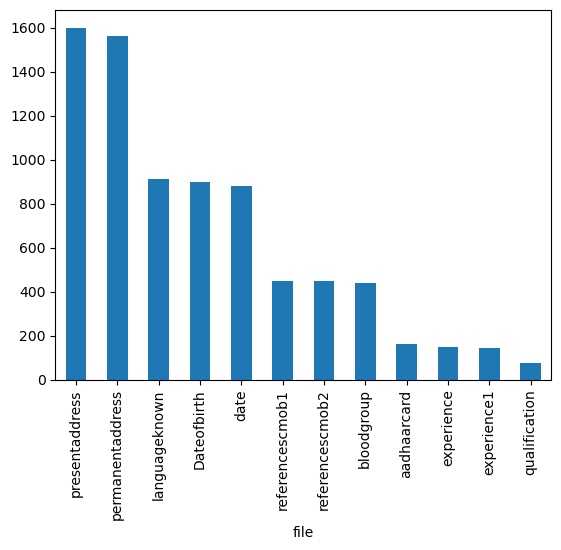

In [37]:
res = df_comb.groupby('file')['n_special'].sum()
res[res>0].sort_values(ascending=False).plot(kind='bar')

In [33]:
d_special

{'-': 2242, '.': 796, ',': 2710, '+': 229, '/': 1746, '&': 2}

### Inference:
- Only 6 different special characters are present with '&' being neglegible

In [ ]:
def count_special_character(data, s_chr):
    cnt = 0
    if 
    for char in data:
        if char in string.punctuation:
            cnt += 1
            if char in d_special:
                d_special[char] += 1
            else:
                d_special[char] = 1
    return cnt   

In [39]:
df_comb['n_hipen'] = df_comb['actual_text'].apply(lambda x: x.count('-'))
df_comb['n_dot'] = df_comb['actual_text'].apply(lambda x: x.count('.'))
df_comb['n_comma'] = df_comb['actual_text'].apply(lambda x: x.count(','))
df_comb['n_plus'] = df_comb['actual_text'].apply(lambda x: x.count('+'))
df_comb['n_slash'] = df_comb['actual_text'].apply(lambda x: x.count('/'))
df_comb.head()

,folder,file,pred_text,actual_text,n_special,n_hipen,n_dot,n_comma,n_plus,n_slash
0,MIT_290,nationality,indian,Indian,0,0,0,0,0,0
1,MIT_290,Dateofbirth,"3/6,1972",03-06-1972,2,2,0,0,0,0
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal,0,0,0,0,0,0
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001",4,0,2,2,0,0
4,MIT_290,experience,7 .years at Talwar-sha,7 years at Talwar-Sha,1,1,0,0,0,0


In [41]:
df_comb[df_comb['n_special'] > 0].groupby('file').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1512\2299758303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comb[df_comb['n_special'] > 0].groupby('file').sum()


,n_special,n_hipen,n_dot,n_comma,n_plus,n_slash
file,,,,,,
Dateofbirth,898,174,0,0,0,724
aadhaarcard,164,0,164,0,0,0
bloodgroup,441,212,0,0,229,0
date,880,154,0,0,0,726
experience,150,150,0,0,0,0
experience1,143,143,0,0,0,0
languageknown,910,0,0,910,0,0
permanentaddress,1564,219,302,900,0,142
presentaddress,1600,215,330,900,0,154


# Compute Metrics

In [20]:
df_comb_base = pd.read_csv(r"E:\Nextstep\MLChallenge\DeHaDo_AI\Results\OCR\Combined_Inference_Base.csv")
df_comb_base.head()

,Unnamed: 0,folder,file,pred_text,actual_text,n_special,n_hipen,n_dot,n_comma,n_plus,n_slash
0,0,MIT_290,nationality,indian,Indian,0,0,0,0,0,0
1,1,MIT_290,Dateofbirth,"3/6,1972",03-06-1972,2,2,0,0,0,0
2,2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal,0,0,0,0,0,0
3,3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001",4,0,2,2,0,0
4,4,MIT_290,experience,7 .years at Talwar-sha,7 years at Talwar-Sha,1,1,0,0,0,0


In [21]:
compute_cer_wer(df_comb_base['pred_text'], df_comb_base['actual_text'])

{'cer': 0.29306117711914814, 'wer': 1.0427321829740452}

In [34]:
print("CER: ", char_error_rate(df_comb_base['actual_text'], df_comb_base['pred_text']))
print("WER: ", word_error_rate(df_comb_base['actual_text'], df_comb_base['pred_text']))

CER:  0.2944990845075519
WER:  1.0427321829740452


In [30]:
import time
import psutil
import numpy as np

# --- METRICS & EFFICIENCY ---
def levenshtein_distance(s1, s2):
    if isinstance(s1, str):
        s1 = list(s1)
    if isinstance(s2, str):
        s2 = list(s2)
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

def word_error_rate(y_true, y_pred):
    total_words = 0
    total_errors = 0
    for t, p in zip(y_true, y_pred):
        t_words = t.split()
        p_words = p.split()
        total_words += len(t_words)
        total_errors += levenshtein_distance(t_words, p_words)
    return total_errors / total_words if total_words > 0 else 0.0

def char_error_rate(y_true, y_pred):
    total_chars = 0
    total_errors = 0
    for t, p in zip(y_true, y_pred):
        total_chars += len(t)
        total_errors += levenshtein_distance(t, p)
    return total_errors / total_chars if total_chars > 0 else 0.0

def field_accuracy(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_true, y_pred)

def document_level_accuracy(y_true, y_pred, doc_ids):
    from collections import defaultdict
    doc_true = defaultdict(list)
    doc_pred = defaultdict(list)
    for doc_id, t, p in zip(doc_ids, y_true, y_pred):
        doc_true[doc_id].append(t)
        doc_pred[doc_id].append(p)
    correct_docs = 0
    for doc_id in doc_true:
        if doc_true[doc_id] == doc_pred[doc_id]:
            correct_docs += 1
    return correct_docs / len(doc_true) if doc_true else 0.0


In [31]:
char_error_rate(df_comb[df_comb['file'] == 'Dateofbirth']['actual_text'], df_comb[df_comb['file'] == 'Dateofbirth']['pred_text'])

0.6876956417047917

In [49]:
field_list = df_comb['file'].unique()
cer = {}
wer = {}
for field in field_list:
    # print(field)
    predictions = df_comb[df_comb['file'] == field]['pred_text']
    actual = df_comb[df_comb['file'] == field]['actual_text']
    cer[field] = char_error_rate(actual, predictions)
    wer[field] = word_error_rate(actual, predictions)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'nationality'),
  Text(1, 0, 'Dateofbirth'),
  Text(2, 0, 'Fatherhusbandname'),
  Text(3, 0, 'permanentaddress'),
  Text(4, 0, 'experience'),
  Text(5, 0, 'date'),
  Text(6, 0, 'presentaddress'),
  Text(7, 0, 'gender'),
  Text(8, 0, 'bloodgroup'),
  Text(9, 0, 'experience1'),
  Text(10, 0, 'qualification'),
  Text(11, 0, 'languageknown'),
  Text(12, 0, 'referencescmob2'),
  Text(13, 0, 'pancard'),
  Text(14, 0, 'maritalstatus'),
  Text(15, 0, 'contactnumber'),
  Text(16, 0, 'AlternateNo'),
  Text(17, 0, 'place'),
  Text(18, 0, 'candidatename'),
  Text(19, 0, 'referencescmob1'),
  Text(20, 0, 'aadhaarcard'),
  Text(21, 0, 'NONE')])

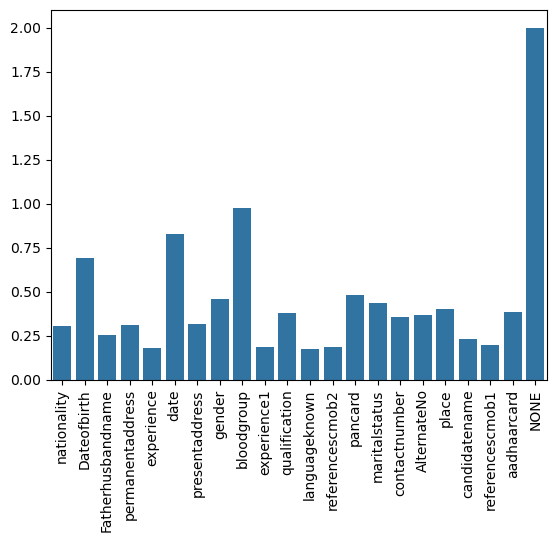

In [52]:
import seaborn as sns
sns.barplot(x = cer.keys(), y = cer.values())
plt.xticks(rotation=90)

In [58]:
metrics_large = pd.DataFrame(cer.values(), columns=['cer'], index = cer.keys())
metrics_large['wer'] = wer
metrics_large

,cer,wer
nationality,0.304676,0.852941
Dateofbirth,0.687696,3.839644
Fatherhusbandname,0.252202,0.830000
permanentaddress,0.310923,1.300696
experience,0.176803,0.422158
date,0.824570,4.268182
presentaddress,0.315119,1.297668
gender,0.459750,1.328090
bloodgroup,0.976954,1.578231
experience1,0.187324,0.454582


In [61]:
df_processed = df_comb.copy()
import re

In [142]:
df_processed = df_comb.copy()
df_processed['processed_text'] = df_processed['pred_text']

In [64]:
def remove_special_char(text):
    cleaned_text = re.sub(r'[^A-Za-z0-9]+', '', text)
    return cleaned_text

In [69]:
def numeric_only(text):
    cleaned_text = re.sub(r'[^0-9]+', '', text)
    return cleaned_text

In [75]:
def char_space(text):
    cleaned_text = re.sub(r'[^A-Za-z ]+', '', text)
    return cleaned_text.strip()

In [218]:
def lang_specific(text, camelcase=True):
    text = re.sub(r'[^A-Za-z ,]+', '', text)
    text = re.sub(r'^[^A-Za-z0-9]+|[^A-Za-z0-9]+$', '', text) # Remove special character at start and end
    text = re.sub(r'[^A-Za-z0-9, ]+', ',', text) # Remove single special character to comma
    text = re.sub(r'\s+,', ',', text) # Remove extra spaces before comma
    words = []
    for word in text.split():
        if camelcase:
            capital_letters = sum(1 for char in text if char.isupper())
            if capital_letters <= len(word)//2:
                # word = word.strip().lower()
                word = word.capitalize().strip()
            else:
                word = word.strip()
        else:
            word = word.strip()
        words.append(word)
    return " ".join(words)

In [242]:
def date_specific(text):
    text = text.replace('(', '/').replace(')', '/') # Slash is mis represented as ( by model
    cleaned_text = re.sub(r'[^0-9\-/]+', '', text)
    return cleaned_text

In [216]:
def bloodgroup_specific(text):
    cleaned_text = re.sub(r'[^ABOTabot0-1+\-]+', '', text)
    cleaned_text = cleaned_text.replace('t', '+').replace('0', 'O')
    return cleaned_text.upper().strip()

In [198]:
def generic(text):
    cleaned_text = re.sub(r'[^A-Za-z0-9 +\-]+', '', text)
    return cleaned_text.strip()

In [312]:
reference_specific("ether Kamdan90558 T1533")

'etherKamdanT - 905581533'

In [313]:
def reference_specific(text):
    cleaned_text = re.sub(r'[^A-Za-z0-9 \-]+', '', text)
    words = cleaned_text.split("-")
    if len(words) == 1:        
        cleaned_text = " - ".join([re.sub(r'[^A-Za-z]+', '', text), re.sub(r'[^0-9]+', '', text)])
    elif len(words) == 2:
        cleaned_text = " - ".join([process_words2(words[0]).strip(), re.sub(r'[^0-9]+', '', words[1])])
        
    # for i in range(len(words)):
    #     if i+1 <= len(words):
    #         check_words()
    return cleaned_text.strip()

In [304]:
def process_words2(text):
    words = []
    for word in text.split():
        word = word.capitalize().strip()
        words.append(word)
    return " ".join(words)

In [176]:
def alphabets_only(text):
    cleaned_text = re.sub(r'[^A-Za-z]+', '', text)
    return cleaned_text.capitalize()

In [154]:
def process_words(text, camelcase=False):
    words = []
    for word in text.split():
        if camelcase:
            capital_letters = sum(1 for char in text if char.isupper())
            if capital_letters <= len(word)//2:
                # word = word.strip().lower()
                word = word.capitalize()
            else:
                word = word.strip()
        else:
            word = word.strip()
        words.append(word)
    return " ".join(words)

In [160]:
def alphanum_specialchar(text):
    cleaned_text = re.sub(r'[^A-Za-z0-9 +\-/,.]+', '', text)
    return cleaned_text.strip()

In [226]:
def address_specific(text):
    text = re.sub(r'^[^A-Za-z0-9]+|[^A-Za-z0-9]+$', '', text) # Remove special character at start and end
    text = re.sub(r'[^A-Za-z0-9, ]+', ',', text) # Remove single special character to comma
    text = re.sub(r'\s+,', ',', text) # Remove extra spaces before comma
    return text

In [153]:
process_words("MUThu  kumar ", True)

'MUThu kumar'

In [146]:
field_list

array(['nationality', 'Dateofbirth', 'Fatherhusbandname',
       'permanentaddress', 'experience', 'date', 'presentaddress',
       'gender', 'bloodgroup', 'experience1', 'qualification',
       'languageknown', 'referencescmob2', 'pancard', 'maritalstatus',
       'contactnumber', 'AlternateNo', 'place', 'candidatename',
       'referencescmob1', 'aadhaarcard', 'NONE'], dtype=object)

In [317]:
def post_processing(data):
    if data[0] in ['Dateofbirth', 'date']:
        return date_specific(data[1])
    elif data[0] in ['nationality', 'gender', 'maritalstatus']:
        return alphabets_only(data[1])
    elif data[0] in ['candidatename', 'Fatherhusbandname', 'place']:
        clean_text = char_space(data[1])
        return process_words(clean_text, True)
    elif data[0] in ['contactnumber', 'AlternateNo', 'aadhaarcard']:
        return numeric_only(data[1])
    elif data[0] in ['permanentaddress', 'presentaddress']:
        clean_text = alphanum_specialchar(data[1])
        clean_text = address_specific(clean_text)
        return process_words(clean_text, False)
    elif data[0] in ['bloodgroup']:
        return bloodgroup_specific(data[1])
    elif data[0] in ['experience', 'experience1', 'qualification']:
        clean_text = generic(data[1])
        return process_words(clean_text, False)
    elif data[0] in ['referencescmob1', 'referencescmob2']:
        clean_text = reference_specific(data[1])
        return clean_text
    elif data[0] in ['pancard']:
        return remove_special_char(data[1])
    elif data[0] in ['languageknown']:
        return lang_specific(data[1])
    else:
        return ""

In [318]:
df_processed['processed_text'] = df_processed[['file', 'pred_text']].apply(post_processing, axis=1)

Wridgeship
Kashyap
Aradhana
Mane
Azaan
Konda
Lucky
Parikh
Mitali
Hedge
Karan
Das
Ekolinga
Romo
Chotrush
Shratt
Rachit
Chander
Nitesh
Chhabra
Logan
Groves
Ojas
Semi
Amaisia
Solanki
Omoja
Mital
Southvik
Deep
Eshana
Rattan
Zetaan
Dugal
Vrighti
Banik
Animal
Gaba
Farai
Barrad
Dayita
Bena
Darika
Halder
Saumya
Khurama
Premuel
Malhotra
Oscale
Sures
Ponagan
Prasad
Nether
Kamdan
Tagrati
Wali
Wazir
Thakkar
Yashasi
Sawkney
Balvan
Keer
Ansh
Korean
Adlya
Apte
Jarmit
Atwal
Lakshmi
Dixit
Pratyush
Samra
Mekhala
Pandit
Amrita
Mahal
Isaac
Taylor
Meahama
Bhattachanyya
Militati
Naidur
Yahvi
Suresh
Hemangini
Narayan
Alexander
Baini
Nimnat
Rajagopal
Aarnav
Dani
Anmol
Vig
Vedika
Mutti
Valana
Datta
Samuh
Barman
Mason
Badami
Yachana
Dhaliwal
Turvi
Hallick
Gopal
Ravel
Smarth
Kala
Lipika
Kulkarni
Pratyush
Thakur
Dalaza
Butala
Frederick
Bail
Jeet
Sankan
Nidhi
Bal
Nitesh
Kuruvilla
Daniel
Krish
Andira
Seth
Dakshesh
Morax
Roureen
Tak
Ehaling
Haldet
Anita
Barbara
Joshua
Shere
Ilebel
Kaunda
Amera
Sengupta
Wyatt
Shulela

In [319]:
char_error_rate(df_processed['actual_text'], df_processed['processed_text'])

0.16248000752657824

In [320]:
word_error_rate(df_processed['actual_text'], df_processed['processed_text'])

0.4590602743654701

# Metrics

- CER and WER between predicted and processed texts

In [321]:
cer = {}
wer = {}
f_acc = {}
for field in field_list:
    df_temp = df_processed[df_processed['file']==field]
    cer[field] = [char_error_rate(df_temp['actual_text'], df_temp['pred_text']), char_error_rate(df_temp['actual_text'], df_temp['processed_text'])]
    wer[field] = [word_error_rate(df_temp['actual_text'], df_temp['pred_text']), word_error_rate(df_temp['actual_text'], df_temp['processed_text'])]
    f_acc[field] = [field_accuracy(df_temp['actual_text'], df_temp['pred_text']), field_accuracy(df_temp['actual_text'], df_temp['processed_text'])]
cer['All'] = [char_error_rate(df_processed['actual_text'], df_processed['pred_text']), char_error_rate(df_processed['actual_text'], df_processed['processed_text'])]
wer['All'] = [word_error_rate(df_processed['actual_text'], df_processed['pred_text']), word_error_rate(df_processed['actual_text'], df_processed['processed_text'])]
f_acc['All'] = [field_accuracy(df_processed['actual_text'], df_processed['pred_text']), field_accuracy(df_processed['actual_text'], df_processed['processed_text'])]

In [326]:
df_processed['field_acc_pred'] = df_processed['pred_text'] == df_processed['actual_text']
df_processed['field_acc_processed'] = df_processed['processed_text'] == df_processed['actual_text']
df_processed.groupby('folder')['field_acc_processed'].mean()

folder
MIT_10      0.400000
MIT_101     0.300000
MIT_106     0.350000
MIT_109     0.350000
MIT_11      0.150000
MIT_110     0.000000
MIT_111     0.315789
MIT_117     0.500000
MIT_119     0.500000
MIT_120     0.350000
MIT_121     0.300000
MIT_122     0.476190
MIT_128     0.400000
MIT_129     0.550000
MIT_13      0.761905
MIT_131     0.450000
MIT_133     0.500000
MIT_135     0.400000
MIT_142     0.300000
MIT_145     0.250000
MIT_147     0.200000
MIT_148     0.050000
MIT_151     0.450000
MIT_155     0.700000
MIT_16      0.550000
MIT_162     0.200000
MIT_163     0.238095
MIT_165     0.400000
MIT_167     0.500000
MIT_169     0.450000
MIT_173     0.550000
MIT_174     0.428571
MIT_177     0.263158
MIT_18      0.250000
MIT_183     0.500000
MIT_185     0.400000
MIT_186     0.500000
MIT_187     0.380952
MIT_19      0.450000
MIT_191     0.500000
MIT_194     0.300000
MIT_196     0.450000
MIT_199     0.550000
MIT_2       0.350000
MIT_20      0.350000
MIT_200     0.500000
MIT_203     0.700000
MIT_20

In [254]:
field_accuracy(df_processed['actual_text'], df_processed['pred_text'])

0.05523486134691567

In [255]:
field_accuracy(df_processed['actual_text'], df_processed['processed_text'])

0.3826825127334465

In [322]:
cer_df = pd.DataFrame.from_dict(cer, orient='index', columns = ['cer_pred', 'cer_processed'])
wer_df = pd.DataFrame.from_dict(wer, orient='index', columns = ['wer_pred', 'wer_processed'])
facc_df = pd.DataFrame.from_dict(f_acc, orient='index', columns = ['facc_pred', 'facc_processed'])
metrics_df = pd.concat([cer_df, wer_df, facc_df], axis=1)

In [269]:
def final_score(data):
    return ((100 - (data[0] * 100)) * 0.35) + \
           ((100 - (data[1] * 100)) * 0.35) + \
           (data[2] * 0.15)

In [323]:
metrics_df['final_score_pred'] = metrics_df[['cer_pred', 'wer_pred', 'facc_pred']].apply(final_score, axis=1)
metrics_df['final_score_processed'] = metrics_df[['cer_processed', 'wer_processed', 'facc_processed']].apply(final_score, axis=1)                                                                                     
metrics_df                                                                                                             

,cer_pred,cer_processed,wer_pred,wer_processed,facc_pred,facc_processed,final_score_pred,final_score_processed
nationality,0.304676,0.077300,0.852941,0.183258,0.352941,0.816742,29.536350,61.002979
Dateofbirth,0.687696,0.215266,3.839644,0.677060,0.004454,0.322940,-88.456207,38.817024
Fatherhusbandname,0.252202,0.113788,0.830000,0.388889,0.082222,0.404444,32.135262,52.466992
permanentaddress,0.310923,0.272515,1.300696,0.732715,0.000000,0.015556,13.593322,34.819292
experience,0.176803,0.145936,0.422158,0.341845,0.051111,0.144444,49.044012,52.949341
date,0.824570,0.262408,4.268182,0.936364,0.000000,0.063636,-108.246314,28.052543
presentaddress,0.315119,0.276913,1.297668,0.729767,0.000000,0.017778,13.552447,34.768859
gender,0.459750,0.017442,1.328090,0.058427,0.031461,0.941573,7.430339,67.485827
bloodgroup,0.976954,0.135271,1.578231,0.290249,0.074830,0.709751,-19.420258,55.213263
experience1,0.187324,0.152242,0.454582,0.365784,0.035556,0.124444,47.538600,51.887743


In [271]:
metrics_df.to_csv("metrics_test_set.csv")

In [288]:
metrics_df[metrics_df['wer_processed'] > 0.4]

,cer_pred,cer_processed,wer_pred,wer_processed,facc_pred,facc_processed,final_score_pred,final_score_processed
Dateofbirth,0.687696,0.215266,3.839644,0.677060,0.004454,0.322940,-88.456207,38.817024
permanentaddress,0.310923,0.272515,1.300696,0.732715,0.000000,0.015556,13.593322,34.819292
date,0.824570,0.262408,4.268182,0.936364,0.000000,0.063636,-108.246314,28.052543
presentaddress,0.315119,0.276913,1.297668,0.729767,0.000000,0.017778,13.552447,34.768859
qualification,0.379851,0.155794,1.236273,0.570715,0.024444,0.428889,13.439318,44.636498
referencescmob2,0.185652,0.146522,0.680556,0.584444,0.068889,0.102222,39.693063,44.431517
pancard,0.482692,0.232692,2.615385,0.769231,0.009615,0.230769,-38.431250,34.967308
contactnumber,0.354889,0.104222,2.451111,0.517778,0.077778,0.482222,-28.198333,48.302333
AlternateNo,0.367489,0.099327,2.549327,0.517937,0.076233,0.482063,-32.077130,48.468049
place,0.400965,0.169430,1.530337,0.617978,0.053933,0.498876,2.412527,42.515561


# WER Analysis

# Field Metric Analysis

In [324]:
field_name = 'referencescmob1'

df_processed[(df_processed['field_acc_processed'] == False) & (df_processed['file'] == field_name)]

,folder,file,pred_text,actual_text,processed_text,field_acc_pred,field_acc_processed
19,MIT_290,referencescmob1,Aradhana Mane -7491845991,Aradhana Mane - 7491845991,Aradhana Mane - 7491845991,False,False
60,MIT_484,referencescmob1,Karan Das - 85149384IN .,Karan Das - 8514938414,Karan Das - 85149384,False,False
80,MIT_101,referencescmob1,chotrush Shratt - 96752/6530 .,Chatresh Shroff - 9675216550,Chotrush Shratt - 967526530,False,False
101,VIT_778,referencescmob1,nitesh chhabra - 9683345928,Nitesh Chhabra - 9683345928,Nitesh Chhabra - 9683345928,False,False
121,MIT_587,referencescmob1,Fiyaz Naxain 1948-9166-7,Fiyaz Narain - 9483916677,Fiyaz Naxain 1948-9166-7,False,False
141,MIT_52,referencescmob1,Ojas Semi - 977326248 1 .,Ojas Suri - 9773262487,Ojas Semi - 9773262481,False,False
161,MIT_482,referencescmob1,Omoja Mital - 7022088228,Omaja Mital - 7022088228,Omoja Mital - 7022088228,False,False
200,TCE_1368,referencescmob1,Vrighti Banik - 950402056 ),Vrishti Banik - 9304020561,Vrighti Banik - 950402056,False,False
219,TCE_1047,referencescmob1,Farai Barrad - 89613 86273,Faraj Barad - 8961386273,Farai Barrad - 8961386273,False,False
239,MIT_233,referencescmob1,Darika Halder-9020997208,Darika Halder - 9020997208,Darika Halder - 9020997208,False,False


In [328]:
field_name = 'referencescmob1'

len(df_processed[(df_processed['field_acc_processed'] == False) & (df_processed['file'] == field_name)])

371

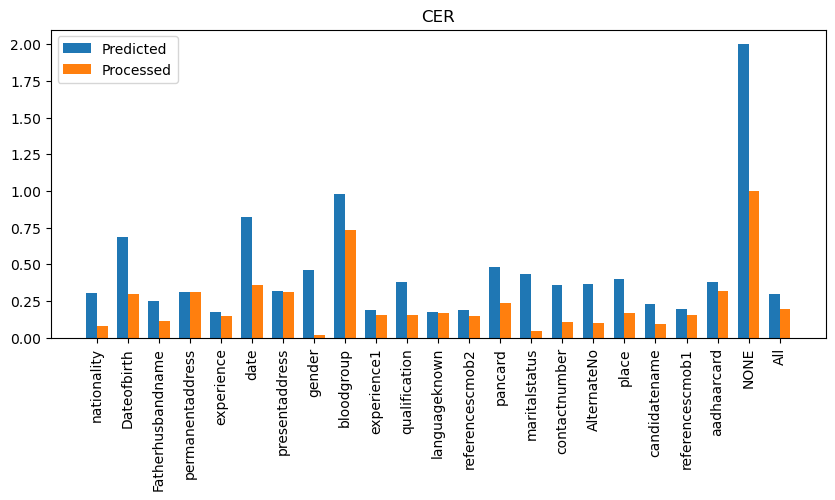

In [212]:
keys = list(cer.keys())
val1 = [cer[k][0] for k in keys]
val2 = [cer[k][1] for k in keys]
x = np.arange(len(keys))  # Positions for keys
width = 0.35  # Width of each bar

plt.figure(figsize=(10, 4))
plt.bar(x - width/2, val1, width, label='Predicted')
plt.bar(x + width/2, val2, width, label='Processed')
plt.xticks(x, keys, rotation=90)
plt.title('CER')
plt.legend()
plt.show()

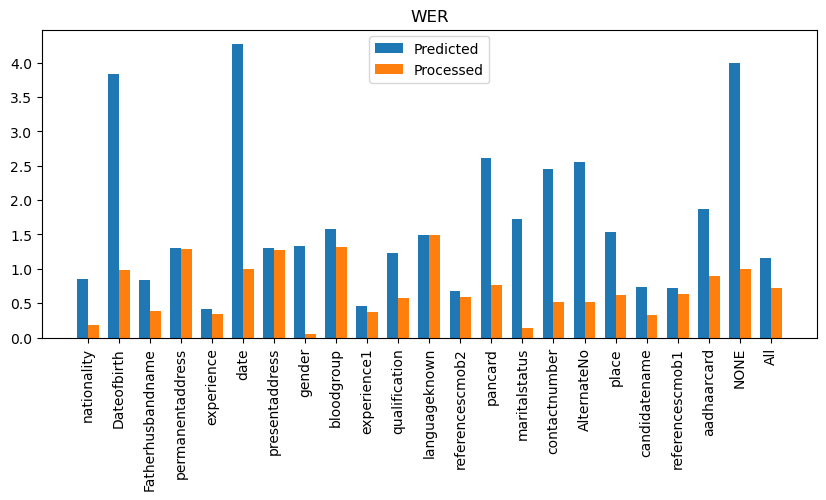

In [213]:
keys = list(wer.keys())
val1 = [wer[k][0] for k in keys]
val2 = [wer[k][1] for k in keys]
x = np.arange(len(keys))  # Positions for keys
width = 0.35  # Width of each bar

plt.figure(figsize=(10, 4))
plt.bar(x - width/2, val1, width, label='Predicted')
plt.bar(x + width/2, val2, width, label='Processed')
plt.xticks(x, keys, rotation=90)
plt.title('WER')
plt.legend()
plt.show()

### CER/WER Analysis
- CER: Blood Group
- WER: perm/present Address, DOB/Date, Blood Group, language known, 

## Blood Group Analysis

In [214]:
field = 'bloodgroup'
df_temp = df_processed[df_processed['file'] == field]
print(df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']])

     pred_text actual_text processed_text
48         A F          A-              A
69     about .         AB+           ABO+
130         Ar          A-              A
190        ove          O-              O
209         A.          A-              A
...        ...         ...            ...
8473       ABT         AB+            ABT
8492     # A "          A+              A
8511       0 #          O+              O
8590       0 #          O+              O
8610     0 1 .          O+             O1

[128 rows x 3 columns]


## Language Group Analysis

In [223]:
pd.set_option('display.max_rows', None)
field = 'languageknown'
df_temp = df_processed[df_processed['file'] == field]
print("CER: ", char_error_rate(df_temp['actual_text'], df_temp['processed_text']))
print("WER: ", word_error_rate(df_temp['actual_text'], df_temp['processed_text']))
df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']]

CER:  0.0672710788757933
WER:  0.2520265291083272


,pred_text,actual_text,processed_text
11,"Tamil , English , Malayalam , Gusarati","Tamil, Malayalam, English, Gujarati","Tamil, English, Malayalam, Gusarati"
133,English . Telugu .,"English, Telugu",English Telugu
193,"Tarnil , English , trade .","Tamil, English, Hindi","Tarnil, English, Trade"
289,"Madayalam , Manathi , Louisiana","Malayalam, Marathi, Gujarati","Madayalam, Manathi, Louisiana"
326,"Gumajati , Marathi , Huischi , Malayalam","Gujarati, Marathi, Hindi, Malayalam","Gumajati, Marathi, Huischi, Malayalam"
345,"Hindi's Telugu , Bengali , Gujarati","Hindi, Telugu, Bengali, Gujarati","Hindis Telugu, Bengali, Gujarati"
422,"English ; Malayalam , Telugu","English, Malayalam, Telugu","English Malayalam, Telugu"
440,"Gujmati , Telugu .","Gujarati, Telugu","Gujmati, Telugu"
460,"Bengali , Tarsil , Guitarate","Bengali, Tamil, Gujarati","Bengali, Tarsil, Guitarate"
480,"Maratti , Kannada , Telugu .","Marathi, Kannada, Telugu","Maratti, Kannada, Telugu"


# Permanent Address

In [232]:
pd.set_option('display.max_rows', None)
field = 'permanentaddress'
df_temp = df_processed[df_processed['file'] == field]
print("CER: ", char_error_rate(df_temp['actual_text'], df_temp['processed_text']))
print("WER: ", word_error_rate(df_temp['actual_text'], df_temp['processed_text']))
df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']]

CER:  0.2725151362260343
WER:  0.7327146171693736


,pred_text,actual_text,processed_text
3,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001","H,NO, 18, LOYAL CURCLE, JALANDHAR,309"
23,"H.No. 57 , Pandit Nagor : Thoothukudi 148026","H.No. 57, Pandit Nagar, Thoothukudi 148026","H,No, 57, Pandit Nagor Thoothukudi 148026"
43,"H.NO. 148 , Sampath , Begugorai -3","H.No. 148, Sampath, Begusarai-826493","H,NO, 148, Sampath, Begugorai,3"
64,"84187 , Dholiwal , Granette mayor - 4.28.39","84/87, Dhaliwal, Gandhinagar-420439","84187, Dholiwal, Granette mayor, 4,28,39"
84,"22/42 , Taylor Path , Hospet-774575 .","22/42, Tailor Path, Hospet-774575","22,42, Taylor Path, Hospet,774575"
105,"H. No. 52 , Bhakta , Nagpur -600011","H.No. 52, Bhakta, Nagpur-600011","H, No, 52, Bhakta, Nagpur,600011"
125,"H. No. ie. Dhalinal Path , Aungaon","H.No. 12, Dhaliwal Path, Gurgaon 966278","H, No, ie, Dhalinal Path, Aungaon"
145,"26,655 , Bhodti , Morbi 253809 .","26/655, Bhatti, Morbi 253809","26,655, Bhodti, Morbi 253809"
165,"87/8b , Hole Nagour , Berhampur-213170","87/86, Gole Nagar, Berhampur-213170","87,8b, Hole Nagour, Berhampur,213170"
185,"594 , Dhalimal Zila , Bangalore-567453","594, Dhaliwal Zila, Bangalore-567453","594, Dhalimal Zila, Bangalore,567453"


In [233]:
len(df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']])

443

# Date Analysis

In [246]:
pd.set_option('display.max_rows', None)
field = 'date'
df_temp = df_processed[df_processed['file'] == field]
print("CER: ", char_error_rate(df_temp['actual_text'], df_temp['processed_text']))
print("WER: ", word_error_rate(df_temp['actual_text'], df_temp['processed_text']))
df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']]

CER:  0.2624078624078624
WER:  0.9363636363636364


,pred_text,actual_text,processed_text
5,12/05 ( 2025 .,12-05-2025,12/05/2025
25,4/20 (2023 .,11/20/2023,4/20/2023
45,01 ( 14 ) 2022 .,1/14/2022,01/14/2022
86,to3/90 (2022 .,3/30/2022,3/90/2022
107,or lobby 2022,07-06-2022,2022
127,or (29 ( 2025 .,7/29/2025,/29/2025
147,03 ( 29 ( 2025 .,3/29/2025,03/29/2025
167,09 04 ( 2023 .,09-04-2023,0904/2023
187,orfirst 2023 .,7/11/2023,2023
206,"04 (071,2003 .",4/7/2023,04/0712003


In [236]:
len(df_temp[df_temp['actual_text'] != df_temp['processed_text']][['pred_text','actual_text','processed_text']])

439

In [143]:
field_name = 'Dateofbirth'
df_temp = df_processed[df_processed['file'] == field_name]
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] = df_processed[['file', 'pred_text']].apply(post_processing, axis=1)
df_processed
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
# char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

,folder,file,pred_text,actual_text,processed_text
0,MIT_290,nationality,Indian .,Indian,Indian .
1,MIT_290,Dateofbirth,3/6 ( 1972 .,03-06-1972,3/61972
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal,Bahadurjit Aggarwal
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001","H.NO. 18 , LOYAL CURCLE , JALANDHAR-309"
4,MIT_290,experience,7 . YEARS AT TALWAR-SHA .,7 years at Talwar-Sha,7 . YEARS AT TALWAR-SHA .
...,...,...,...,...,...
8830,VIT_981,contactnumber,89 #633637,8963633637,89 #633637
8831,VIT_981,AlternateNo,7051365857 .,7051365857,7051365857 .
8832,VIT_981,place,Taiper,Jaipur,Taiper
8833,VIT_981,candidatename,Aarini Dey .,Aarini Dey,Aarini Dey .


In [109]:
field_name = 'Dateofbirth'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(date_specific)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.2997832891885384

In [110]:
field_name = 'date'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(date_specific)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.3601965601965602

In [130]:
field_name = 'bloodgroup'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(bloodgroup_specific)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.7364729458917836

## Nationality

In [112]:
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == 'nationality']['pred_text'].apply(remove_special_char)
df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == 'nationality']['actual_text'], df_processed[df_processed['file'] == 'nationality']['processed_text'])

0.3046757164404223

In [113]:
field_name = 'pancard'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(remove_special_char)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.2326923076923077

In [114]:
field_name = 'maritalstatus'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(remove_special_char)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.14465408805031446

In [115]:
field_name = 'gender'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(remove_special_char)
# df_processed[df_processed['file'] == 'nationality'][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])

0.0872093023255814

In [116]:
field_name = 'contactnumber'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(numeric_only)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.10422222222222222

In [117]:
field_name = 'AlternateNo'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(numeric_only)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.09932735426008969

In [118]:
field_name = 'aadhaarcard'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(numeric_only)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.3157199471598415

In [119]:
field_name = 'candidatename'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] =  df_processed[df_processed['file'] == field_name]['pred_text'].apply(char_space)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.10352898811667267

In [120]:
field_name = 'Fatherhusbandname'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] = df_processed[df_processed['file'] == field_name]['pred_text'].apply(char_space)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.12655042243393852

In [121]:
field_name = 'place'
df_processed.loc[df_processed['file'] == field_name, 'processed_text'] = df_processed[df_processed['file'] == field_name]['pred_text'].apply(char_space)
df_processed[df_processed['file'] == field_name][['pred_text', 'processed_text']]
char_error_rate(df_processed[df_processed['file'] == field_name]['actual_text'], df_processed[df_processed['file'] == field_name]['processed_text'])  

0.1805848658426289

In [123]:
char_error_rate(df_processed['actual_text'], df_processed['pred_text'])

0.298689362194866

In [134]:
word_error_rate(df_processed['actual_text'], df_processed['pred_text'])

1.1546771186845752

In [132]:
char_error_rate(df_processed['actual_text'], df_processed['processed_text'])

0.2237275378680967

In [133]:
word_error_rate(df_processed['actual_text'], df_processed['processed_text'])

0.821997036470532

In [ ]:
# No. of words
# Date: 
# Only numeric
# Only Alpha numeric
# 

# Anand OCR Model Results Analysis